# Process MAPT hairpin that we introduced every possible mutation into the sequence and ran EnsembleRNA 

- We introduced random mutations into every base in the MAPT hairpin
- We then ran EnsembleRNA on the dotbracket structures generated from suboptimal sampling of sequence with mutation 
- The map of projection was the suboptimal structures generated from the actual disease and SNP landscape of MAPT hairpin
- We want to compare the percentage of structures that are in the cluster with the hairpin when comparing the mutated sequence to the actual disease and SNP landscape of MAPT hairpin

In [1]:
import pandas as pd

In [24]:
# Function to get ratio difference 
def ratio_Diff(df):
    #ratio_map = df[1]/(df[1]+df[2])
    ratio_map = 6.0/1000
    ratio_mut = df[3]/(df[3]+df[4])
    return(ratio_map-ratio_mut)

In [25]:
# Random mutation structural ensemble data
random_muts = pd.read_csv("../tmp/Structures_forRandomMuts.csv",sep=",",header=None)
random_muts.head()

,0,1,2,3,4
0,Position_0_A-G,1513,7442,9,990
1,Position_0_A-T,1513,7442,9,989
2,Position_0_A-C,1513,7442,7,989
3,Position_1_A-G,1513,7442,3,992
4,Position_1_A-T,1513,7442,7,991


In [26]:
# Calculate the difference in percentage change 
diff_percent_randomMuts = ratio_Diff(random_muts)

In [27]:
type(diff_percent_randomMuts)

pandas.core.series.Series

In [28]:
import matplotlib.pyplot as plt

(array([  1.,   1.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   1.,
          0.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   3.,   0.,
          1.,   0.,   1.,   0.,   1.,   4.,   1.,   2.,   0.,   2.,   1.,
          4.,   5.,   3.,   2.,   3.,   0.,   2.,   2.,   6.,   4.,   3.,
          2.,   4.,   4.,  11.,   5.,  10.,   6.,   6.,  15.,  23.,  65.,
        208.]),
 array([-0.99198995, -0.98201005, -0.97203015, -0.96205025, -0.95207035,
        -0.94209045, -0.93211055, -0.92213065, -0.91215075, -0.90217085,
        -0.89219095, -0.88221106, -0.87223116, -0.86225126, -0.85227136,
        -0.84229146, -0.83231156, -0.82233166, -0.81235176, -0.80237186,
        -0.79239196, -0.78

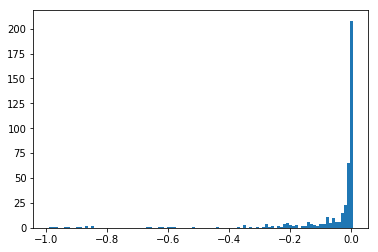

In [29]:
plt.hist(diff_percent_randomMuts,bins=100)
#plt.axvline(x=percent_map[0])

In [30]:
# Random mutation structural ensemble data
actual_muts = pd.read_csv("../tmp/Structures_forMuts.csv",sep=",",header=None)
actual_muts.head()

,0,1,2,3,4
0,CM1510268,1513,7442,14,984
1,CM014584,1513,7442,13,981
2,CM1411311,1513,7442,83,916
3,CS003183,1513,7442,15,977
4,CS140469,1513,7442,14,981


In [31]:
# Mutations that are splicing ones
splice_muts = actual_muts[actual_muts[0].str.contains("CS")]
# Mutations that are coding ones
coding_muts = actual_muts[actual_muts[0].str.contains("CM")]
# Common SNPs 
common_snps = actual_muts[actual_muts[0].str.contains("rs")]

In [32]:
# Calculate the difference in percentage change for each category
splice_diff = ratio_Diff(splice_muts)
coding_diff = ratio_Diff(coding_muts)
commonSNPs_diff = ratio_Diff(common_snps)

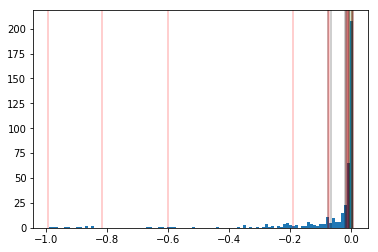

In [33]:
plt.hist(diff_percent_randomMuts,bins=100)
for i in splice_diff:
    plt.axvline(x=i,color="red",alpha=0.25)
for i in coding_diff:
    plt.axvline(x=i,color="black",alpha=0.25)
for i in commonSNPs_diff:
    plt.axvline(x=i,color="green",alpha=0.25)

In [34]:
%load_ext rpy2.ipython
%R require(ggplot2)
%R require(reshape)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array([1], dtype=int32)

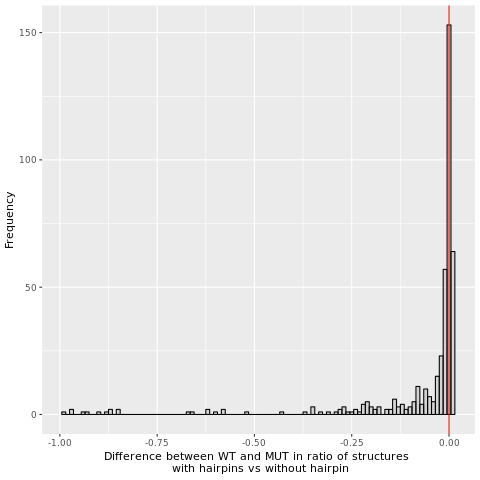

In [40]:
%%R -i diff_percent_randomMuts,splice_diff,coding_diff,commonSNPs_diff
diff_percent_randomMuts_DF = data.frame(diff=diff_percent_randomMuts)
p <- ggplot(diff_percent_randomMuts_DF, aes(x=diff)) + 
    geom_histogram(binwidth=0.01,colour="black", fill="grey",alpha=0.5) +
    geom_vline(xintercept=0,color="red") +
    #geom_vline(data=splice_diff_DF,aes(xintercept=as.numeric(spliceDiff)),color="red",alpha=0.5,show.legend=T) + 
    #geom_vline(data=coding_diff_DF,aes(xintercept=as.numeric(codeDiff)),color="blue",alpha=0.5,show.legend=T) +
    #geom_vline(data=commonSNPs_diff_DF,aes(xintercept=as.numeric(snpDiff)),color="darkgreen",alpha=0.5,show.legend=T) +
    labs(x = "Difference between WT and MUT in ratio of structures \n with hairpins vs without hairpin", y ="Frequency")
ggsave(file="../results/DistributionOfRatioDiffsStructuresWithHairpinsVsWithout_RandomMutationsDist.png",width=6,height=4,dpi=300)
p

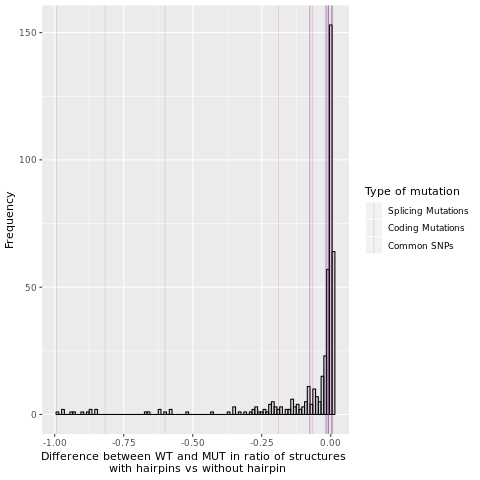

In [36]:
%%R -i diff_percent_randomMuts,splice_diff,coding_diff,commonSNPs_diff
diff_percent_randomMuts_DF = data.frame(diff=diff_percent_randomMuts)
splice_diff_DF = data.frame(name=rep("Splicing Mutations", length(splice_diff)),diff=splice_diff)
code_diff_DF = data.frame(name=rep("Coding Mutations",length(coding_diff)),diff=coding_diff)
snp_diff_DF = data.frame(name=rep("Common SNPs",length(commonSNPs_diff)),diff=commonSNPs_diff)
alldiff <- rbind(splice_diff_DF,code_diff_DF,snp_diff_DF)
p <- ggplot(diff_percent_randomMuts_DF, aes(x=diff)) + 
    geom_histogram(binwidth=0.01,colour="black", fill="grey",alpha=0.5) + 
    geom_vline(aes(xintercept=diff,color=name),data=alldiff,size=0.25,alpha=0.25,show_guide=T) +
    scale_color_manual("Type of mutation",values=c("red","blue","darkgreen")) +
    #geom_vline(data=splice_diff_DF,aes(xintercept=as.numeric(spliceDiff)),color="red",alpha=0.5,show.legend=T) + 
    #geom_vline(data=coding_diff_DF,aes(xintercept=as.numeric(codeDiff)),color="blue",alpha=0.5,show.legend=T) +
    #geom_vline(data=commonSNPs_diff_DF,aes(xintercept=as.numeric(snpDiff)),color="darkgreen",alpha=0.5,show.legend=T) +
    labs(x = "Difference between WT and MUT in ratio of structures \n with hairpins vs without hairpin", y ="Frequency")
ggsave(file="../results/DistributionOfRatioDiffsStructuresWithHairpinsVsWithout_RandomMutationsDistPlusDiseaseMutsOverlaid.png",width=8,height=6,dpi=300)
p

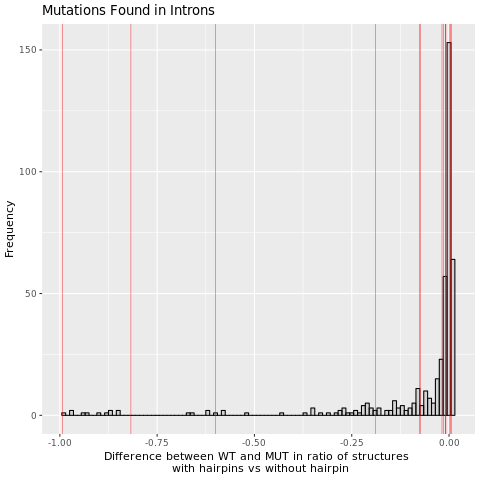

In [45]:
%%R -i diff_percent_randomMuts,splice_diff
diff_percent_randomMuts_DF = data.frame(diff=diff_percent_randomMuts)
splice_diff_DF = data.frame(name=rep("Splicing Mutations", length(splice_diff)),diff=splice_diff)
#code_diff_DF = data.frame(name=rep("Coding Mutations",length(coding_diff)),diff=coding_diff)
#snp_diff_DF = data.frame(name=rep("Common SNPs",length(commonSNPs_diff)),diff=commonSNPs_diff)
#alldiff <- rbind(splice_diff_DF,code_diff_DF,snp_diff_DF)
p <- ggplot(diff_percent_randomMuts_DF, aes(x=diff)) + 
    geom_histogram(binwidth=0.01,colour="black", fill="grey",alpha=0.5) + 
    geom_vline(aes(xintercept=diff),data=splice_diff_DF,size=0.25,alpha=0.75,color="red") +
    #scale_color_manual("Type of mutation",values=c("red","blue","darkgreen")) +
    #geom_vline(data=splice_diff_DF,aes(xintercept=as.numeric(spliceDiff)),color="red",alpha=0.5,show.legend=T) + 
    #geom_vline(data=coding_diff_DF,aes(xintercept=as.numeric(codeDiff)),color="blue",alpha=0.5,show.legend=T) +
    #geom_vline(data=commonSNPs_diff_DF,aes(xintercept=as.numeric(snpDiff)),color="darkgreen",alpha=0.5,show.legend=T) +
    labs(x = "Difference between WT and MUT in ratio of structures \n with hairpins vs without hairpin", y ="Frequency", title= "Mutations Found in Introns")
ggsave(file="../results/DistributionOfRatioDiffsStructuresWithHairpinsVsWithout_RandomMutationsDistPlusIntronicMutsOverlaid.png",width=8,height=6,dpi=300)
p

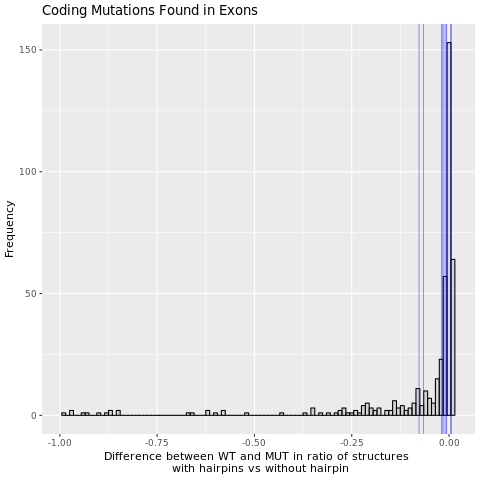

In [46]:
%%R -i diff_percent_randomMuts,coding_diff
diff_percent_randomMuts_DF = data.frame(diff=diff_percent_randomMuts)
#splice_diff_DF = data.frame(name=rep("Splicing Mutations", length(splice_diff)),diff=splice_diff)
code_diff_DF = data.frame(name=rep("Coding Mutations",length(coding_diff)),diff=coding_diff)
#snp_diff_DF = data.frame(name=rep("Common SNPs",length(commonSNPs_diff)),diff=commonSNPs_diff)
#alldiff <- rbind(splice_diff_DF,code_diff_DF,snp_diff_DF)
p <- ggplot(diff_percent_randomMuts_DF, aes(x=diff)) + 
    geom_histogram(binwidth=0.01,colour="black", fill="grey",alpha=0.5) + 
    geom_vline(aes(xintercept=diff),data=code_diff_DF,size=0.25,alpha=0.75,color="blue") +
    #scale_color_manual("Type of mutation",values=c("red","blue","darkgreen")) +
    #geom_vline(data=splice_diff_DF,aes(xintercept=as.numeric(spliceDiff)),color="red",alpha=0.5,show.legend=T) + 
    #geom_vline(data=coding_diff_DF,aes(xintercept=as.numeric(codeDiff)),color="blue",alpha=0.5,show.legend=T) +
    #geom_vline(data=commonSNPs_diff_DF,aes(xintercept=as.numeric(snpDiff)),color="darkgreen",alpha=0.5,show.legend=T) +
    labs(x = "Difference between WT and MUT in ratio of structures \n with hairpins vs without hairpin", y ="Frequency", title= "Coding Mutations Found in Exons")
ggsave(file="../results/DistributionOfRatioDiffsStructuresWithHairpinsVsWithout_RandomMutationsDistPlusCodingMutsOverlaid.png",width=8,height=6,dpi=300)
p

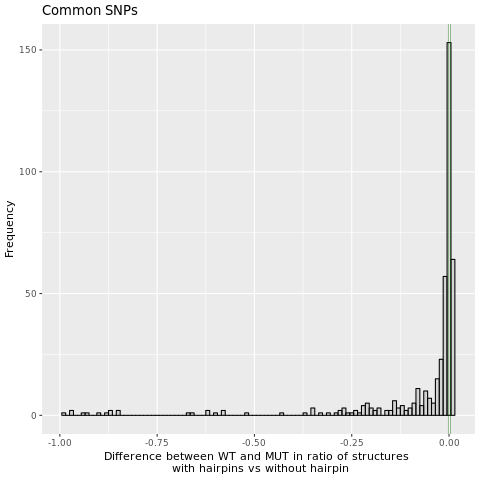

In [48]:
%%R -i diff_percent_randomMuts,commonSNPs_diff
diff_percent_randomMuts_DF = data.frame(diff=diff_percent_randomMuts)
#splice_diff_DF = data.frame(name=rep("Splicing Mutations", length(splice_diff)),diff=splice_diff)
#code_diff_DF = data.frame(name=rep("Coding Mutations",length(coding_diff)),diff=coding_diff)
snp_diff_DF = data.frame(name=rep("Common SNPs",length(commonSNPs_diff)),diff=commonSNPs_diff)
#alldiff <- rbind(splice_diff_DF,code_diff_DF,snp_diff_DF)
p <- ggplot(diff_percent_randomMuts_DF, aes(x=diff)) + 
    geom_histogram(binwidth=0.01,colour="black", fill="grey",alpha=0.5) + 
    geom_vline(aes(xintercept=diff),data=snp_diff_DF,size=0.25,alpha=0.75,color="darkgreen") +
    #scale_color_manual("Type of mutation",values=c("red","blue","darkgreen")) +
    #geom_vline(data=splice_diff_DF,aes(xintercept=as.numeric(spliceDiff)),color="red",alpha=0.5,show.legend=T) + 
    #geom_vline(data=coding_diff_DF,aes(xintercept=as.numeric(codeDiff)),color="blue",alpha=0.5,show.legend=T) +
    #geom_vline(data=commonSNPs_diff_DF,aes(xintercept=as.numeric(snpDiff)),color="darkgreen",alpha=0.5,show.legend=T) +
    labs(x = "Difference between WT and MUT in ratio of structures \n with hairpins vs without hairpin", y ="Frequency", title= "Common SNPs")
ggsave(file="../results/DistributionOfRatioDiffsStructuresWithHairpinsVsWithout_RandomMutationsDistCommonSNPsOverlaid.png",width=8,height=6,dpi=300)
p

In [49]:
# Position at which intron starts
start_intron=60
startClust = 50
endClust = 80

In [54]:
# Random mutations to view in region that is clustered
muts_Clust = ["_".join(list(i)) for i in random_muts[0].str.split("_").values if int(list(i)[1])>=startClust and int(list(i)[1])<=endClust]
muts_Clust_DF = random_muts[random_muts[0].isin(muts_Clust)]
muts_Clust_DF.head()

,0,1,2,3,4
150,Position_50_A-G,1513,7442,6,994
151,Position_50_A-T,1513,7442,0,950
152,Position_50_A-C,1513,7442,0,1000
153,Position_51_G-A,1513,7442,4,996
154,Position_51_G-T,1513,7442,0,999


In [55]:
# Diff for random mutations in region clustered
diff_percent_mutsClust = ratio_Diff(muts_Clust_DF)

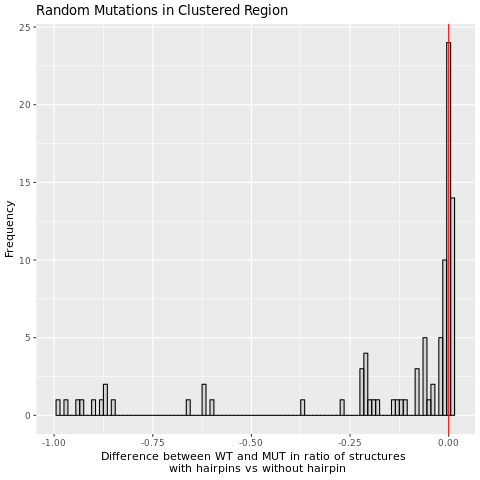

In [56]:
%%R -i diff_percent_mutsClust
diff_percent_mutsClust_DF = data.frame(diff=diff_percent_mutsClust)
p <- ggplot(diff_percent_mutsClust_DF, aes(x=diff)) + 
    geom_histogram(binwidth=0.01,colour="black", fill="grey",alpha=0.5) +
    geom_vline(xintercept=0,color="red") +
    #geom_vline(data=splice_diff_DF,aes(xintercept=as.numeric(spliceDiff)),color="red",alpha=0.5,show.legend=T) + 
    #geom_vline(data=coding_diff_DF,aes(xintercept=as.numeric(codeDiff)),color="blue",alpha=0.5,show.legend=T) +
    #geom_vline(data=commonSNPs_diff_DF,aes(xintercept=as.numeric(snpDiff)),color="darkgreen",alpha=0.5,show.legend=T) +
    labs(x = "Difference between WT and MUT in ratio of structures \n with hairpins vs without hairpin", y ="Frequency", title="Random Mutations in Clustered Region")
ggsave(file="../results/DistributionOfRatioDiffsStructuresWithHairpinsVsWithout_RandomMutationsDistInRegionClustered.png",width=6,height=4,dpi=300)
p

In [57]:
# Random mutations to outside region that is clustered
muts_NotClust_DF = random_muts[~random_muts[0].isin(muts_Clust)]
muts_NotClust_DF.head()

,0,1,2,3,4
0,Position_0_A-G,1513,7442,9,990
1,Position_0_A-T,1513,7442,9,989
2,Position_0_A-C,1513,7442,7,989
3,Position_1_A-G,1513,7442,3,992
4,Position_1_A-T,1513,7442,7,991


In [58]:
# Diff for random mutations in region clustered
diff_percent_mutsNotClust = ratio_Diff(muts_NotClust_DF)

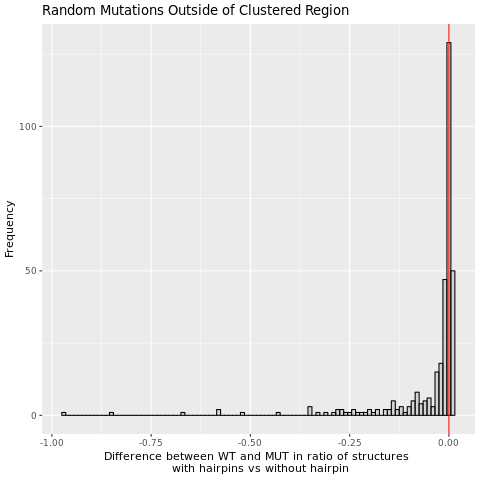

In [59]:
%%R -i diff_percent_mutsNotClust
diff_percent_mutsNotClust_DF = data.frame(diff=diff_percent_mutsNotClust)
p <- ggplot(diff_percent_mutsNotClust_DF, aes(x=diff)) + 
    geom_histogram(binwidth=0.01,colour="black", fill="grey",alpha=0.5) +
    geom_vline(xintercept=0,color="red") +
    #geom_vline(data=splice_diff_DF,aes(xintercept=as.numeric(spliceDiff)),color="red",alpha=0.5,show.legend=T) + 
    #geom_vline(data=coding_diff_DF,aes(xintercept=as.numeric(codeDiff)),color="blue",alpha=0.5,show.legend=T) +
    #geom_vline(data=commonSNPs_diff_DF,aes(xintercept=as.numeric(snpDiff)),color="darkgreen",alpha=0.5,show.legend=T) +
    labs(x = "Difference between WT and MUT in ratio of structures \n with hairpins vs without hairpin", y ="Frequency", title="Random Mutations Outside of Clustered Region")
ggsave(file="../results/DistributionOfRatioDiffsStructuresWithHairpinsVsWithout_RandomMutationsDistOutsideRegionClustered.png",width=6,height=4,dpi=300)
p

In [60]:
# Join both DataFramestogether 
muts_NotClust_DF = muts_NotClust_DF.assign(name=["Not in Clustered Region"]*muts_NotClust_DF.shape[0])
print(muts_NotClust_DF.head())
muts_Clust_DF = muts_Clust_DF.assign(name=["In Clustered Region"]*muts_Clust_DF.shape[0])
print(muts_Clust_DF.head())

                0     1     2  3    4                     name
0  Position_0_A-G  1513  7442  9  990  Not in Clustered Region
1  Position_0_A-T  1513  7442  9  989  Not in Clustered Region
2  Position_0_A-C  1513  7442  7  989  Not in Clustered Region
3  Position_1_A-G  1513  7442  3  992  Not in Clustered Region
4  Position_1_A-T  1513  7442  7  991  Not in Clustered Region
                   0     1     2  3     4                 name
150  Position_50_A-G  1513  7442  6   994  In Clustered Region
151  Position_50_A-T  1513  7442  0   950  In Clustered Region
152  Position_50_A-C  1513  7442  0  1000  In Clustered Region
153  Position_51_G-A  1513  7442  4   996  In Clustered Region
154  Position_51_G-T  1513  7442  0   999  In Clustered Region


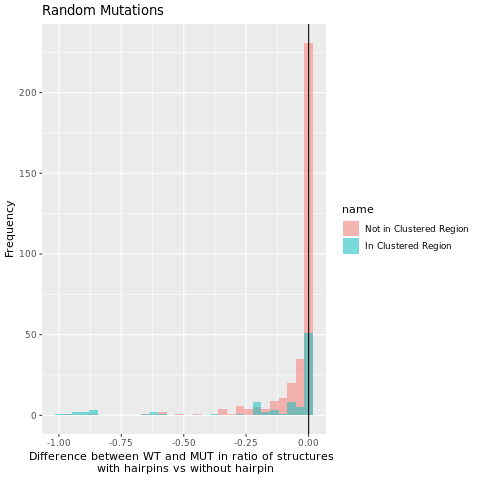

In [66]:
%%R -i diff_percent_mutsNotClust,diff_percent_mutsClust
diff_percent_mutsNotClust_DF = data.frame(diff=diff_percent_mutsNotClust,name=rep("Not in Clustered Region",length(diff_percent_mutsNotClust)))
diff_percent_mutsClust_DF = data.frame(diff=diff_percent_mutsClust,name=rep("In Clustered Region",length(diff_percent_mutsClust)))
all_diff = rbind(diff_percent_mutsNotClust_DF,diff_percent_mutsClust_DF)
p <- ggplot(all_diff,aes(x=diff,fill=name)) + 
    #geom_histogram(data=subset(all_diff,name == "Not in Clustered Region"),binwidth=0.01,fill = "red", alpha = 0.2) +
    #geom_histogram(data=subset(all_diff,name == "In Clustered Region"),binwidth=0.01,fill = "blue", alpha = 0.2) +
    geom_histogram(alpha=0.5, position="identity") +
    geom_vline(xintercept=0,color="black") +
    #geom_vline(data=splice_diff_DF,aes(xintercept=as.numeric(spliceDiff)),color="red",alpha=0.5,show.legend=T) + 
    #geom_vline(data=coding_diff_DF,aes(xintercept=as.numeric(codeDiff)),color="blue",alpha=0.5,show.legend=T) +
    #geom_vline(data=commonSNPs_diff_DF,aes(xintercept=as.numeric(snpDiff)),color="darkgreen",alpha=0.5,show.legend=T) +
    labs(x = "Difference between WT and MUT in ratio of structures \n with hairpins vs without hairpin", y ="Frequency", title="Random Mutations")
ggsave(file="../results/DistributionOfRatioDiffsStructuresWithHairpinsVsWithout_RandomMutationsDistSplitBtwnClusterRegion.png",width=6,height=4,dpi=300)
p